In [10]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold
from IPython.display import display

In [13]:
df_e10 = pd.read_csv('data/e10_1.csv')
df_e12 = pd.read_csv('data/e12_1.csv')
df_e12label = pd.read_csv('data/cell_identity.csv')
df_e12 = pd.concat([df_e12, df_e12label['label']], axis=1, join='inner')

combined = pd.concat([df_e10,df_e12])
# combined = combined.drop(combined.columns[0], axis=1)
print combined.shape
display(combined)

(144, 15803)


,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,...,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,cell_name,l7Rn6,label
0,0,113,0,0,121,17,95,181,119,104,...,0,6,80,9,35,91,0,E10.5_cell1,195,NaN
1,0,100,157,0,168,97,0,356,174,445,...,0,13,47,307,72,211,0,E10.5_cell2,160,NaN
2,0,157,99,0,95,26,102,185,31,269,...,0,0,103,605,220,592,0,E10.5_cell3,30,NaN
3,0,0,0,0,292,0,336,69,43,103,...,0,0,116,158,0,84,0,E10.5_cell4,24,NaN
4,0,101,118,0,26,3,537,197,224,185,...,0,0,223,106,0,402,0,E10.5_cell5,120,NaN
5,0,199,135,0,589,96,384,558,235,248,...,73,0,251,216,114,354,0,E10.5_cell6,206,NaN
6,0,123,0,0,0,0,115,155,28,30,...,0,0,16,187,5,336,0,E10.5_cell7,42,NaN
7,0,28,29,0,183,0,0,166,73,27,...,3,74,71,281,0,263,0,E10.5_cell8,114,NaN
8,0,93,0,0,476,12,44,196,182,127,...,0,8,23,85,60,295,0,E10.5_cell9,241,NaN
9,0,301,40,5,393,39,96,117,169,80,...,89,0,26,343,83,481,0,E10.5_cell11,55,NaN


In [8]:
from keras.models import load_model
print('loading autoencoder')
t0 = time.time()
autoencoder = load_model('autoencoder.h5')
t1 = time.time()
print('Model loaded in: ', t1-t0)

loading autoencoder
('Model loaded in: ', 8.41222095489502)


In [14]:
class Sample:
    X = None
    y = None
    name = None
    def __init__(self, X, y, name = None):
        self.X = X
        self.y = y
        self.name = name

In [20]:
predictors = [x for x in df_e12.columns if x not in ['cell_name', 'label']]
target = Sample(combined[predictors].values, combined.cell_name, combined.label)
def predict_dae():
    denoiseTarget = Sample(autoencoder.predict(target.X), target.y, target.name)
    print denoiseTarget.X
    return denoiseTarget

In [21]:
predict_dae()

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


<__main__.Sample instance at 0x10ea97950>

In [16]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    ##
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], None,
                 color=plt.cm.Set1(1 / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
##
#     if hasattr(offsetbox, 'AnnotationBbox'):
#         # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
#         for i in range(X.shape[0]):
#             dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
#             shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)



Computing t-SNE embedding


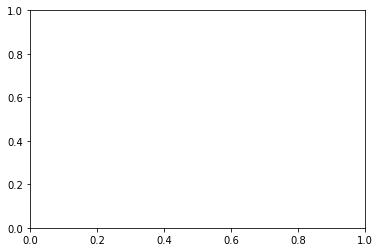

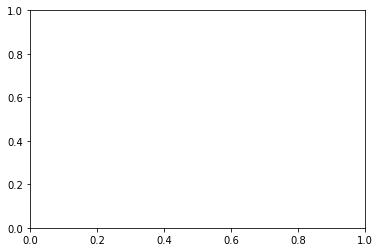

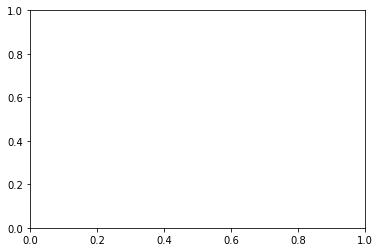

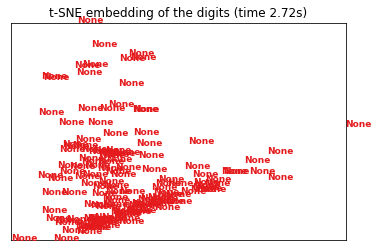

In [17]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()


X_tsne = tsne.fit_transform(combined.values)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()